In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [2]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [3]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  y


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [4]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [5]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.30132369746514415, 0.37426715769763563],
 'diameter': 72.6962175426105,
 'confidence': 0.9155940413475037,
 'timestamp': 354519.09512799996,
 'sphere': {'center': [3.5806676044299843,
   3.5908892479360066,
   35.030411714432226],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [124.74376193215576, 124.84420829728342],
  'axes': [201.37574714008943, 201.37574714008943],
  'angle': 0.0},
 'circle_3d': {'center': [-3.2170627396915066,
   2.3312964569249623,
   27.27126948288092],
  'normal': [-0.6541119073428383, -0.12120437282658975, -0.7466238093444565],
  'radius': 3.0692345291115206},
 'diameter_3d': 6.138469058223041,
 'ellipse': {'center': [57.85414991330767, 120.14070572205395],
  'axes': [53.7138353414861, 72.6962175426105],
  'angle': 5.890584581678283},
 'location': [57.85414991330767, 120.14070572205395],
 'model_confidence': 1.0,
 'theta': 1.6922994375466507,
 'phi': -2.2902

Text(0.5, 0, 'Pupil timestamp (s)')

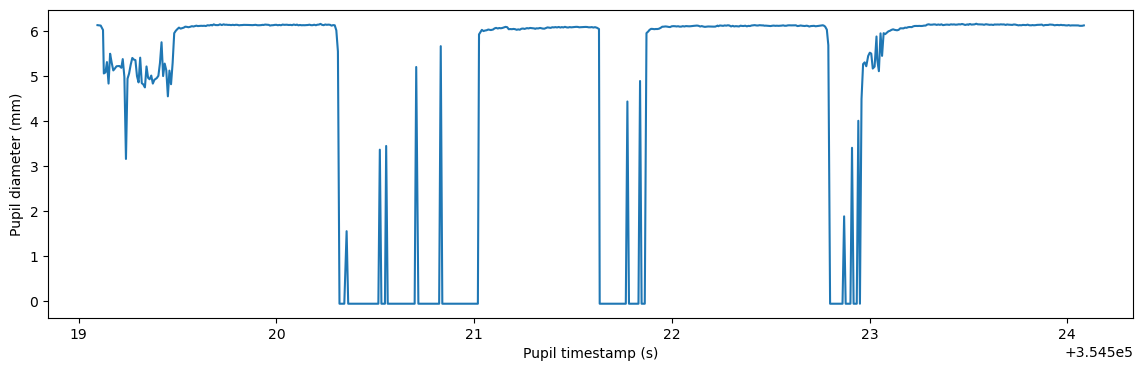

In [6]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')